<a href="https://colab.research.google.com/github/pchikode/Netflix_Data_Analysis/blob/main/Project_Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix_data=pd.read_csv('netflix_titles.csv')

In [ ]:
sns.set_style('darkgrid')

In [ ]:
netflix_data.shape

(8807, 12)

In [ ]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
netflix_data_cleaned=netflix_data.dropna()

In [ ]:
netflix_data_cleaned.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
netflix_data_cleaned.shape

(5332, 12)

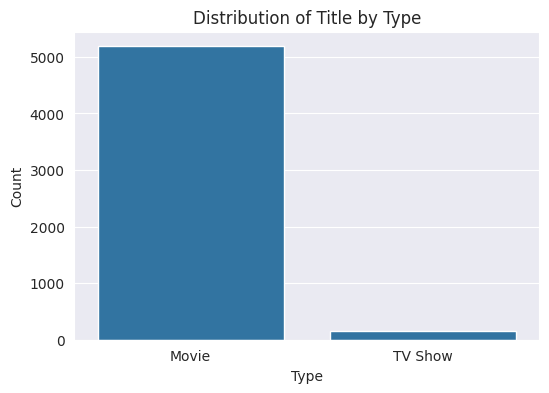

In [ ]:
#visual analysis
#univariate analysis
plt.figure(figsize=(6,4))
sns.countplot(x='type',data=netflix_data_cleaned)
plt.title("Distribution of Title by Type")
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


**Insight**: Movies are more prevalent than TV shows on Netflix. This indicates that Netflix has historically focused more on acquiring or producing movies compared to TV shows.

Recommendation: Netflix could explore increasing their series content to balance the distribution.

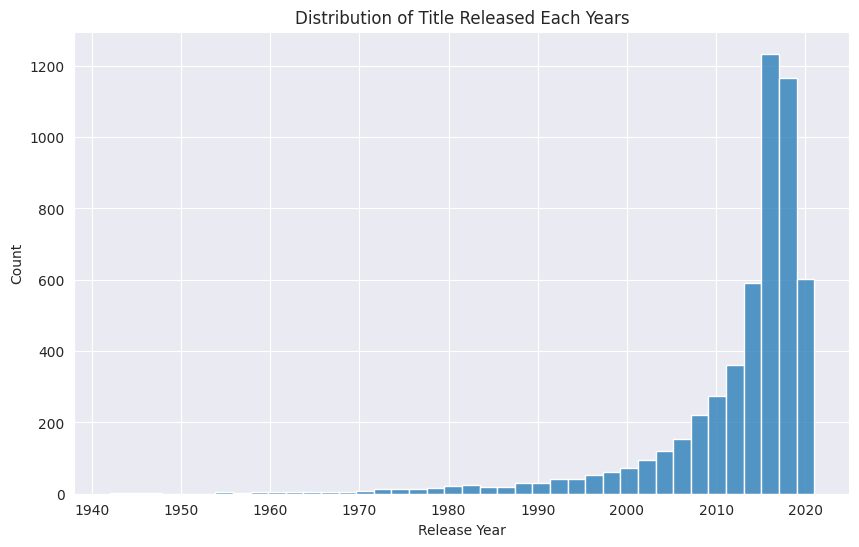

In [ ]:
#Releases by year
plt.figure(figsize=(10,6))
sns.histplot(data=netflix_data_cleaned,x='release_year',bins=40)
plt.title('Distribution of Title Released Each Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


**Insight**: The number of movies released per year has seen a significant increase, especially in the last decade, indicating a growing trend in movie production and acquisition by Netflix.

Recommendation: Netflix should continue to invest in new content to maintain and grow its subscriber base.

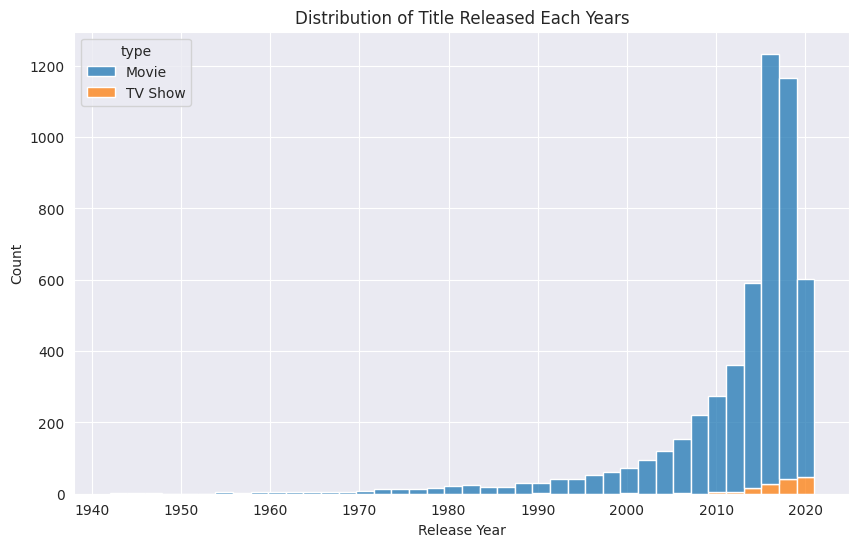

In [ ]:
#variate Analysis
plt.figure(figsize=(10,6))
sns.histplot(data=netflix_data_cleaned,x='release_year',bins=40, hue='type', multiple='stack')
plt.title('Distribution of Title Released Each Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


**Insight**: TV shows are present but overshadowed Still, that small green slice is quietly growing A hint that series content can spark long-term loyalty

Recommendation: Fuel that momentum Invest in standout mini-series compelling dramas, and addictive reality Transform casual watchers into devoted fans

In [ ]:
from collections import Counter


In [ ]:
def get_top_elements(column, n=10):
  all_elements = []
  for item in netflix_data_cleaned[column]:
        elements = item.split(', ') #split the string into a list
        all_elements.extend(elements) #add the list of elements to all_elements list
  element_counts = Counter(all_elements)
  top_n = element_counts.most_common(n)
  return top_n


In [ ]:
top_directors = get_top_elements('director', 10)

In [ ]:
top_directors

[('Jan Suter', 21),
 ('Raúl Campos', 19),
 ('Marcus Raboy', 15),
 ('Jay Karas', 15),
 ('Cathy Garcia-Molina', 13),
 ('Youssef Chahine', 12),
 ('Martin Scorsese', 12),
 ('Jay Chapman', 12),
 ('Steven Spielberg', 11),
 ('Don Michael Paul', 10)]

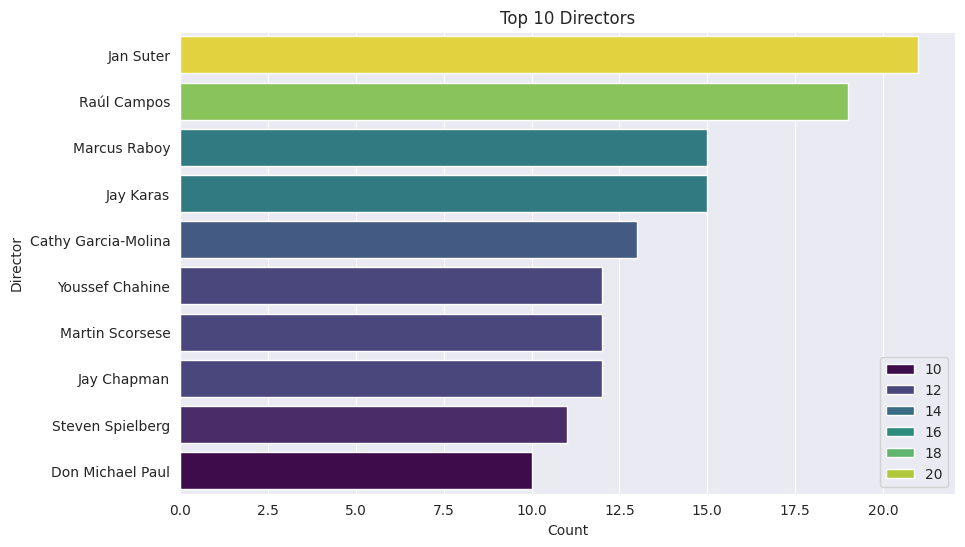

In [ ]:
directors, counts = zip(*top_directors)
plt.figure(figsize=(10, 6))
sns.barplot(y=directors, x=counts, hue=counts, palette='viridis')
plt.title('Top 10 Directors')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

**Insight**: Certain directors are frequently featured.

**Recommendation**: Netflix should continue to collaborate with popular actors and directors to attract their fanbase.

In [ ]:
# Genre Analysis
print("\nTop 10 genres:")
top_genres = netflix_data_cleaned['listed_in'].value_counts().head(10)
print(top_genres)


Top 10 genres:
listed_in
Dramas, International Movies                        336
Stand-Up Comedy                                     286
Comedies, Dramas, International Movies              257
Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                  179
Dramas, International Movies, Romantic Movies       160
Documentaries                                       156
Comedies, International Movies                      152
Comedies, International Movies, Romantic Movies     143
Dramas                                              133
Name: count, dtype: int64


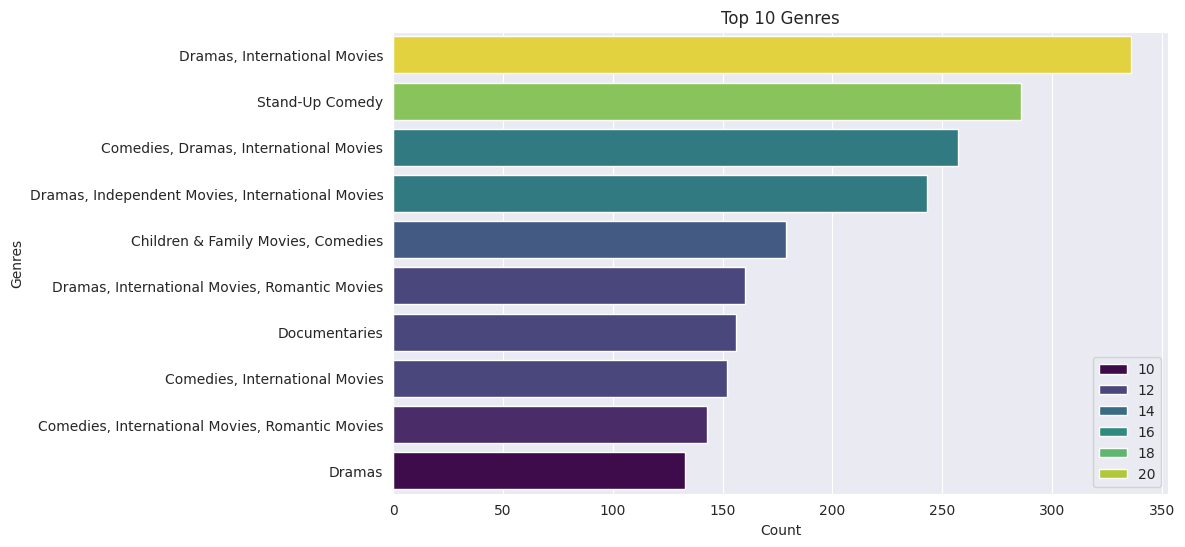

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_genres.index, x=top_genres.values, hue=counts, palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

**Insight**: Drama, Comedy, and International Movies are the most popular genres.

**Recommendation**: Netflix should invest more in these genres, as they are highly popular among viewers.

/tmp/ipython-input-1141183591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '').astype(int)


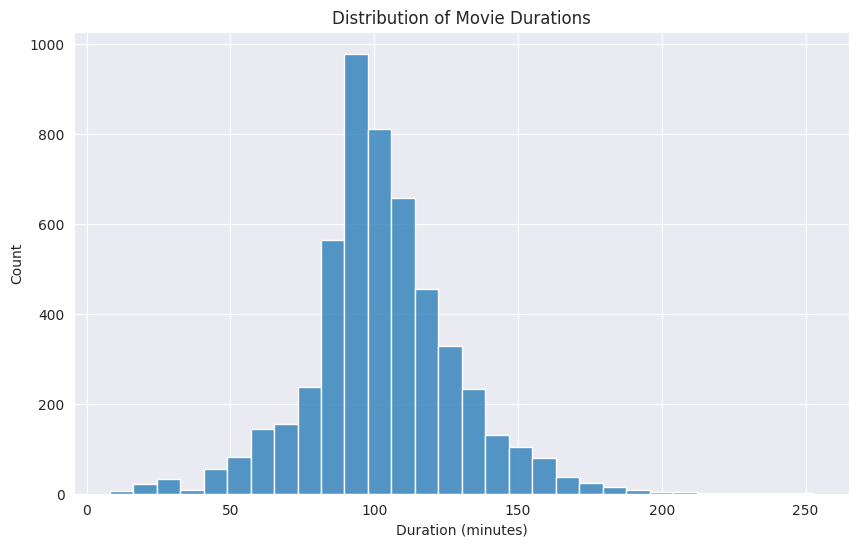

In [ ]:
netflix_movies = netflix_data_cleaned[netflix_data_cleaned['type'] == 'Movie']
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(netflix_movies['duration'], bins=30)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

**Insight**: Most movies have a duration between 80 and 120 minutes.

**Recommendation**: Netflix could consider producing more short films and mini-series to cater to viewers with less time.

/tmp/ipython-input-642928670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries_content.index, x=top_countries_content.values, palette='viridis')


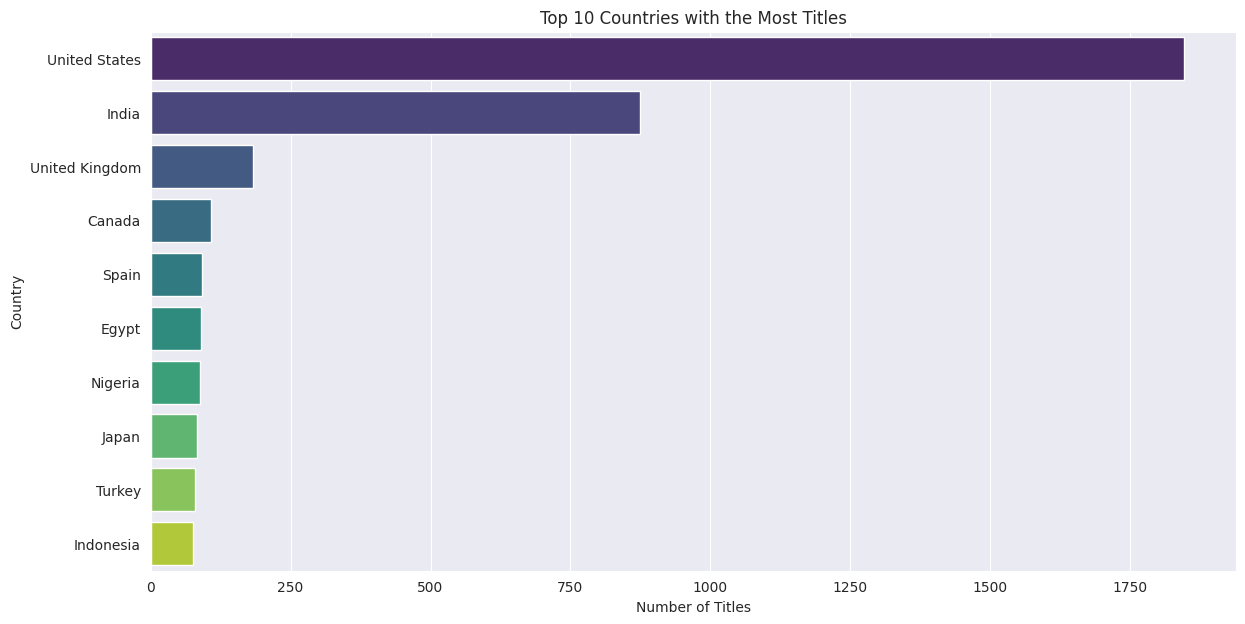

In [ ]:
top_countries_content = netflix_data_cleaned['country'].value_counts().head(10)

plt.figure(figsize=(14, 7))
sns.barplot(y=top_countries_content.index, x=top_countries_content.values, palette='viridis')
plt.title('Top 10 Countries with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**Insight**: The USA leads in terms of content available on Netflix, followed by other countries. This can help in understanding the distribution of content and guide strategic decisions to expand and diversify the content library for other regions.

**Recommendation**: Diversify the content library by acquiring more titles from other countries to cater to a global audience.

## Summary and Recommendations
- **Movie Releases Trend**: The number of movies released each year has been increasing, especially in the last decade. Recommendation: Continue investing in movie content as it shows strong growth.

- **TV Shows vs. Movies**: Movies are more prevalent than TV shows. Recommendation: Balance the content library by increasing the production and acquisition of TV shows.

- **Best Time to Launch TV Shows**: Identifying peak months for TV show releases can help maximize viewership. Recommendation: Launch new TV shows during these peak periods.

- **Actors/Directors Analysis**: Popular actors and directors can attract more viewers. Recommendation: Collaborate with frequently featured actors and directors to draw their fanbase.

- **Focus on TV Shows in Recent Years**: There is a shift towards more TV shows. Recommendation: Maintain this focus and continue to diversify the content offerings with new TV shows.

- **Content in Different Countries**: The USA dominates in content availability. Recommendation: Diversify the content library by acquiring more titles from other countries to cater to a global audience.